<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Solving-$U''(x)-=-f(x),-\quad-u(a)-=-\alpha,-u(b)-=-\beta$-via-Finite-Differences" data-toc-modified-id="Solving-$U''(x)-=-f(x),-\quad-u(a)-=-\alpha,-u(b)-=-\beta$-via-Finite-Differences-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solving $U''(x) = f(x), \quad u(a) = \alpha, u(b) = \beta$ via Finite Differences</a></span></li></ul></div>

# Solving $U''(x) = f(x), \quad u(a) = \alpha, u(b) = \beta$ via Finite Differences
---
> Initial version created September 29, 2017 by Katie Oliveras

As we discussed, when trying to solve numerically solve the differential equation, we pick $N$ points between $x = 0$ and $x = \pi$ that are spaced $\Delta x$ units apart.  Thus, $x_1 = \Delta x$, $x_2 = 2\Delta x$ and so on.  Our goal is to determine $U(x_j)$ denoted as $U(x_j) = U_j$, for $j = 1\ldots N$. For this example problem, let's consider the following boundary value problem:
$$U''(x) = \sin(x), \qquad u(0) = 1, \quad u(\pi) = 2$$

To being, we will import the important libraries as shown in the following code block:

In [33]:
from numpy import *   # This allows you to import numerical routines such as matrix multiplication, etc.
from pylab import * # More needed libraries
%matplotlib inline 

Since we know the values of $a$, $b$, $\alpha$, and $\beta$, as well as the function $f(x)$ let's define them now.

In [78]:
a = 0
b = pi
alpha = 1
beta = 0
def f(x):
    return sin(x)

Now, let's determine how many interior points we want to use, and figure out the appropriate $x$ values given our choice.

In [81]:
N = 20                        #Determine how many points you want to use.
x = linspace(0,pi,N+2)        #Creates an array of equally x values including the boundary values at x = a and x = b.

Now x is a horizontal vector with entries $$x = \left[a\quad x_1 \quad x_2 \quad \ldots \quad x_N \quad b\right]$$  Since we only want the interior values, we just want the second entry through the last entry.  The way this works is by starting at the second entry ('1' since python indexs from zero), and end at the last entry (python truncates the array at one index before the one indicated).

_Note: Using '-1' in an array begins counting from the end of an array._

In [82]:
x = x[1:-1]                   #Take only the interior values.
dx = x[1]-x[0]                #Determine the 'dx' by subtracting two adjacent x values

Now we need to build the $D^2$ matrix that approximates the second derivative.  As we discussed, this matrix take the following form:

$$
D^2 = \frac{1}{\left(\Delta x\right)^2} \cdot\begin{bmatrix} -2 & 1 & 0 & 0 & \ldots\\
1 & -2 & 1 & 0 & \ldots \\
0 & 1 & -2 & 1  & \ldots \\
0 & 0& \ddots & \ddots & \ddots\\
0 & \ldots & 0& 1 & -2\end{bmatrix}$$

The easiest way to compute this matrix is by adding three different matries together.  We create three matrices, the first that has ones above the diagonal, the second that has `-2` on the diagonal, and the third that has ones below the diagonal.  Summing these three matrices, and then multipliying by $\frac{1}{(\Delta x)^2}$ allows us to quickly construct this matrix as shown below:
$$
D^2 = \frac{1}{\left(\Delta x\right)^2} \cdot\left(\begin{bmatrix} 0 & 1 & 0 & 0 & \ldots\\
0 & 0 & 1 & 0 & \ldots \\
0 &0 &0 & 1  & \ldots \\
0 & 0& \ddots & \ddots & \ddots\\
0 & \ldots & 0& 0 & 0\end{bmatrix} + \begin{bmatrix} -2 & 0 & 0 & 0 & \ldots\\
0 & -2 & 0 & 0 & \ldots \\
0 & 0 & -2 & 0  & \ldots \\
0 & 0& \ddots & \ddots & \ddots\\
0 & \ldots & 0& 0 & -2\end{bmatrix} + \begin{bmatrix} 0 & 0 & 0 & 0 & \ldots\\
1 & 0 &0 & 0 & \ldots \\
0 & 1 & 0 & 0  & \ldots \\
0 & 0& \ddots & \ddots & \ddots\\
0 & \ldots & 0& 1 & 0\end{bmatrix}\right)$$

In [87]:
D2 = 1/dx**2*(diag(ones(N-1),1)+diag(-2*ones(N),0) + diag(ones(N-1),-1))

Finally, we need to compute the vector corresponding to $f(x)$ and adjust the first and last entries in order to compensate for the boundary conditions.  Let's use the variable 'g' to represent $f(x)$ and the adjustments.  As discussed, this would take the form
$$g = \begin{bmatrix} f(x_1) - \frac{\alpha}{(\Delta x)^2}\\ f(x_2)\\f(x_3)\\\vdots\\f(x_N)-\frac{\beta}{(\Delta x)^2}\end{bmatrix}$$
In the following, we do precisly this by first calculating $f(x)$, and then modifying the first, and last entries appropriately.

In [88]:
g = f(x)
g[0] = g[0]-alpha/dx**2                 # Modify the first entry to include the -alpha/dx^2 term
g[-1] = g[-1]-beta/dx**2                # Modify the last entry to include the -alpha/dx^2 term

Now we have put all of the ingredients to put together an equation of the form $$D_2 U = g$$  Once we invert the matrix $D_2$, we can solve for the U!  In python, we can use `linalg.solve(D2,g)` to solve this equation!

In [89]:
U = linalg.solve(D2,g)

Voila!  We have numerically solve the boundary value problem!  The vector `U` contains the approximate value of our solution at each of the interior $x$ values.  While we could list the values individually, it is perhaps most useful to plot the solution using the syntax below.  

_Note: If we would like to include the boundary values, the we can use the `hstack` to place the boundary values at the appropriate locations in the array as seen in the first line of the following code block_

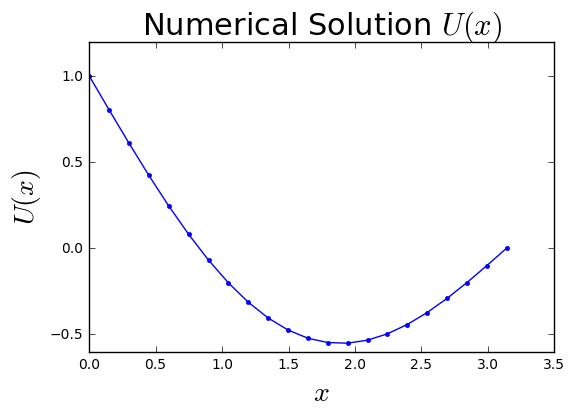

In [90]:
plot(hstack([a,x,b]),hstack([alpha,U,beta]),'.-')       #plot the solution with lines, and a dot at each data point (including boundary values)
xlabel('$x$',fontsize=20)
ylabel('$U(x)$',fontsize=20)
title('Numerical Solution $U(x)$',fontsize=22)
show()

In [19]:
dx

0.28559933214452665